## Since there is no one algorithm suitable in every situation, we try out a few different algorithms and check which one suits us best

## Problem at hand: Given the data of customers at a Telecom company, we have to identify the factors that are causing the customers to leave the company within 2 months

# Accuracy Achieved: 80.8%

# Importing the Necessary Libraries

In [484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Dataset

In [485]:
df = pd.read_excel (r'C:\Users\sreed\Churn.xlsx')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# 1) Data Cleaning
# Checking for "Missing Values"

In [486]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

## Here the TotalCharges field has a null value. We can either delete this record or replace it with a value. Here I choose to replace it with the Mean of the remaining values in the TotalCharges Column

In [487]:
df['TotalCharges'] = df['TotalCharges'].replace(np.nan, df["TotalCharges"].mean())

In [488]:
print("As we can see, the TotalCharges is returning a False for presence of Null Values\n")
print(df.isnull().any())

As we can see, the TotalCharges is returning a False for presence of Null Values

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


# Determining the most significant predictors out of the given 20, which effect the "churn" variable

In [489]:
df.groupby("Churn").mean()

# INFERENCE - The groupby effects the numeric data in the dataframe. Except the MonthlyCharges, the rest of the parameters
# seem to have an affect on whether an employee churned.

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2554.765772
Yes,0.254682,17.979133,74.441332,1531.796094


<AxesSubplot:xlabel='Churn'>

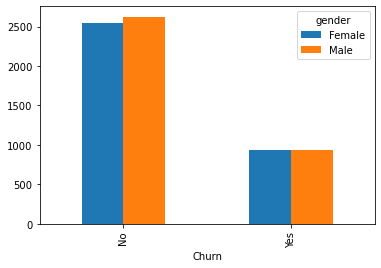

In [490]:
pd.crosstab(df.Churn,df.gender).plot(kind='bar')

# INFERENCE - The observed number of Male and Female customers who churned and did not churn are almost identical. This reveals
# that "Gender" isn't a vital factor in determining if an customers will leave.

# So it is NOT A Contributing Factor

<AxesSubplot:xlabel='Churn'>

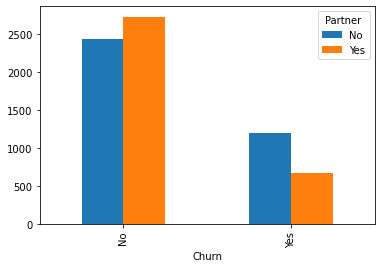

In [491]:
pd.crosstab(df.Churn,df.Partner).plot(kind='bar')

# INFERENCE - The ratios between the customers who left and whether they have partners are differing in this case. So to
# include this effect, we consider this.

# So it IS A Contributing Factor!

<AxesSubplot:xlabel='Churn'>

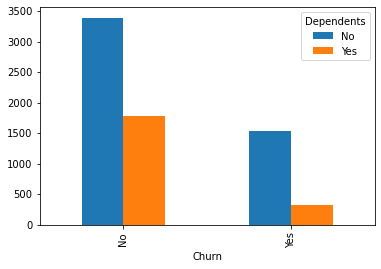

In [492]:
pd.crosstab(df.Churn,df.Dependents).plot(kind='bar')

# INFERENCE - 

# Ratio of customers who DID NOT churn: 3400/1700=2 (Approximate Value)

# Ratio of customers who DID churn: 1600/400=4 (Approximate Value)

# To include this discrepancy, this IS A Contributing Factor

9.2
9.0


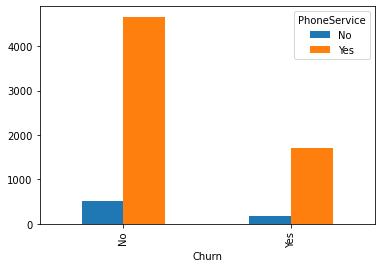

In [493]:
pd.crosstab(df.Churn,df.PhoneService).plot(kind='bar')
print(4600/500)
print(1800/200)

# INFERENCE - From the customers who left and did not leave, the ratio between the customers with and without phone service 
# is around 9. Since the ratio is equal, phone service is not a significant contributor to a employee leaving.

# So it IS NOT a Contributing Factor

<AxesSubplot:xlabel='Churn'>

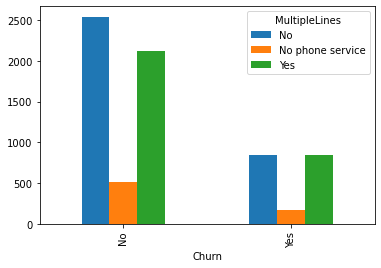

In [494]:
pd.crosstab(df.Churn,df.MultipleLines).plot(kind='bar')

# Average for customers who DID NOT churn:  (multiple lines(yes) + multiple lines(no))/multiple lines(No phone service)
#                                           (2500 + 2100)/500 = 9.2 (Approximate Value)

# Average for customers who DID churn:  (multiple lines(yes) + multiple lines(no))/multiple lines(No phone service)
#                                           (900 + 9000)/200 = 9 (Approximate Value)

# Since the ratios of the people who left and did not leave are almost equal, this IS NOT a Contributing Factor

<AxesSubplot:xlabel='Churn'>

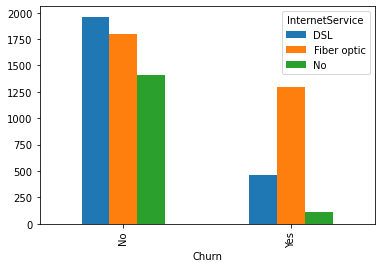

In [495]:
pd.crosstab(df.Churn,df.InternetService).plot(kind='bar')


# INFERENCE -
# Among the customers who churned, a high chunk of them use Fiber optic for internet service and a few use the DSL and even
# fewer do not have a Internet Service

# Due to the erratic differences between, those who left and those who did not, this IS A Contributing Factor

<AxesSubplot:xlabel='Churn'>

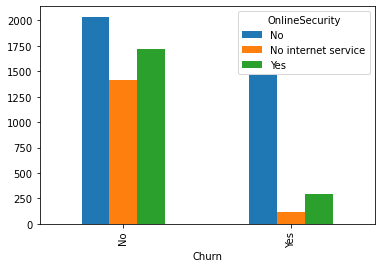

In [496]:
pd.crosstab(df.Churn,df.OnlineSecurity).plot(kind='bar')

# INFERENCE - There is a large percentage of customers who left, with no Online Security and very less in the other 2 categories.


# So it IS A Contributing Factor

<AxesSubplot:xlabel='Churn'>

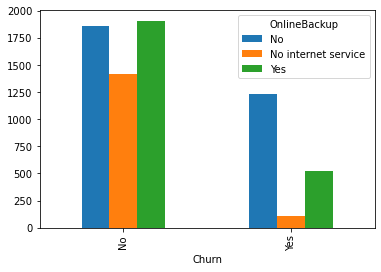

In [497]:
pd.crosstab(df.Churn,df.OnlineBackup).plot(kind='bar')

# INFERENCE - There is a large percentage of customers who left, with no Online Backup and less in the other 2 categories.


# So it IS A Contributing Factor

<AxesSubplot:xlabel='Churn'>

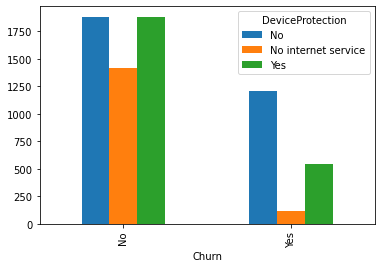

In [498]:
pd.crosstab(df.Churn,df.DeviceProtection).plot(kind='bar')

# INFERENCE - There is a large percentage of customers who left, with no Device Protection and less in the other 2 categories.


# So it IS A Contributing Factor

<AxesSubplot:xlabel='Churn'>

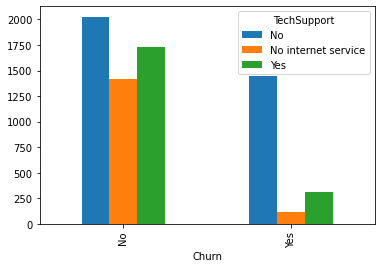

In [499]:
pd.crosstab(df.Churn,df.TechSupport).plot(kind='bar')

# INFERENCE - There is a large percentage of customers who left, with no Technical Support and less in the other 2 categories.


# So it IS A Contributing Factor

<AxesSubplot:xlabel='Churn'>

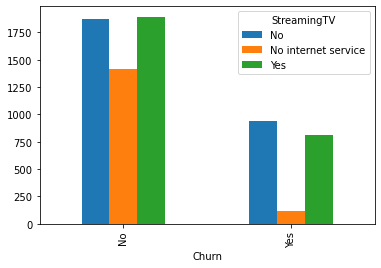

In [500]:
pd.crosstab(df.Churn,df.StreamingTV).plot(kind='bar')

# INFERENCE - There is a small percentage of customers who left, with no internet service and less in the other 2 categories.


# So it IS A Contributing Factor

<AxesSubplot:xlabel='Churn'>

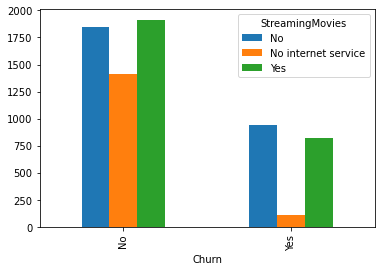

In [501]:
pd.crosstab(df.Churn,df.StreamingMovies).plot(kind='bar')

# INFERENCE - There is a small percentage of customers who left, with no internet service and less in the other 2 categories.


# So it IS A Contributing Factor

<AxesSubplot:xlabel='Churn'>

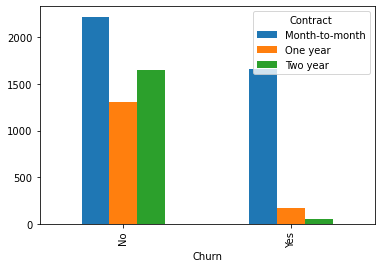

In [502]:
pd.crosstab(df.Churn,df.Contract).plot(kind='bar')

# INFERENCE - Among the customers who churned, most of them had a "Month-to-Month" contract

# So this is a Contributing Factor

<AxesSubplot:xlabel='Churn'>

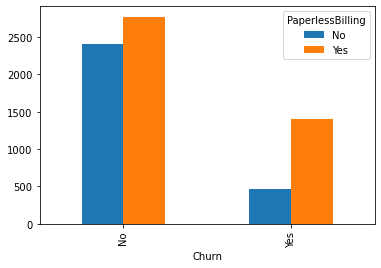

In [503]:
pd.crosstab(df.Churn,df.PaperlessBilling).plot(kind='bar')

# INFERENCE - Because of the difference in ratios among the customers who left and did not leave, we assume that this has an
# affect on customers who churned.

# So this IS A Contributing Factor

<AxesSubplot:xlabel='Churn'>

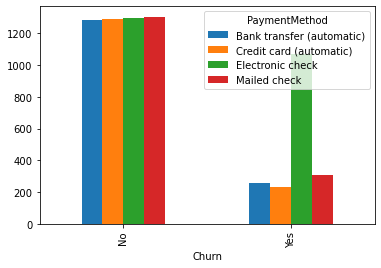

In [504]:
pd.crosstab(df.Churn,df.PaymentMethod).plot(kind='bar')

# INFERENCE - Among the customers who left, there is an even distribution across all the 4 types of payment methods, whereas
# among the customers who churned, a high percentage of them used the "Electronic check" payment method.

# So this is a Contributing Factor

# From the above graphs we can conclude that the factors affecting a person leaving include:
## Partner
## Dependents
## InternetService
## OnlineSecurity
## OnlineBackup
## DeviceProtection
## TechSupport
## StreamingTV
## StreamingMovies
## Contract
## PaperlessBilling
## PaymentMethod
## SeniorCitizen
## Tenure
## Total Charges
# From the above probables, the pairs, (TechSupport, OnlineSecurity), 
# (DeviceProtection, OnlineBackup), (StreamingTV, StreamingMovies) have 
# almost identical graphs and it would be redundant to include both of the 
# members in a pair. So we choose one from each

# First let us drop all the unsignificant variables/columns

# 3) Selected Variables:

In [505]:
df.drop(["customerID","gender","PhoneService","MultipleLines","TechSupport","OnlineBackup","StreamingMovies"], axis="columns",
       inplace=True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,DeviceProtection,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,DSL,Yes,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,DSL,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,DSL,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Fiber optic,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Now let us seperate the churn variable and store in a dataframe called target

In [506]:
target = pd.get_dummies(df.Churn, prefix = "Churn")
target.drop(["Churn_No"], axis="columns", inplace = True)
target

,Churn_Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


## The factors Partner, Dependents, InternetService, OnlineSecurity, DeviceProtection, StreamingTV, Contract, PaperlessBilling, PaymentMethod are all "Nominal/Categorical" data with no proper ordering. So we need to convert them into numerical data before feeding it to out model

## To Encode the said textual data, I'm using get_dummies() function available in pandas library

In [507]:
dummies_Partner = pd.get_dummies(df.Partner, prefix="Partner")
dummies_Partner.head()

,Partner_No,Partner_Yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [508]:
dummies_Dependents = pd.get_dummies(df.Dependents, prefix="Dependents")
dummies_Dependents.head()

,Dependents_No,Dependents_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [509]:
dummies_InternetService = pd.get_dummies(df.InternetService, prefix="InternetService")
dummies_InternetService.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [510]:
dummies_OnlineSecurity = pd.get_dummies(df.OnlineSecurity, prefix="OnlineSecurity")
dummies_OnlineSecurity.head()

,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [511]:
dummies_DeviceProtection = pd.get_dummies(df.DeviceProtection, prefix="DeviceProtection")
dummies_DeviceProtection.head()

,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [512]:
dummies_StreamingTV = pd.get_dummies(df.StreamingTV, prefix="StreamingTV")
dummies_StreamingTV.head()

,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [513]:
dummies_Contract = pd.get_dummies(df.Contract, prefix="Contract")
dummies_Contract.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [514]:
dummies_PaperlessBilling = pd.get_dummies(df.PaperlessBilling, prefix="PaperlessBilling")
dummies_PaperlessBilling.head()

,PaperlessBilling_No,PaperlessBilling_Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [515]:
dummies_PaymentMethod = pd.get_dummies(df.PaymentMethod, prefix="PaymentMethod")
dummies_PaymentMethod.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


### Now we add all these encoded variables to the original data and drop the categorical columns

In [516]:
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,DeviceProtection,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,DSL,Yes,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,DSL,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,DSL,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Fiber optic,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,DSL,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,Yes,Yes,11,DSL,Yes,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,Yes,No,4,Fiber optic,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [517]:
inputs = pd.concat([df, dummies_Partner, dummies_Dependents, dummies_InternetService, dummies_OnlineSecurity,
                    dummies_DeviceProtection, dummies_StreamingTV, dummies_Contract, dummies_PaperlessBilling,
                   dummies_PaymentMethod], axis="columns")
inputs

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,DeviceProtection,StreamingTV,Contract,PaperlessBilling,...,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,Yes,No,1,DSL,No,No,No,Month-to-month,Yes,...,0,1,0,0,0,1,0,0,1,0
1,0,No,No,34,DSL,Yes,Yes,No,One year,No,...,0,0,1,0,1,0,0,0,0,1
2,0,No,No,2,DSL,Yes,No,No,Month-to-month,Yes,...,0,1,0,0,0,1,0,0,0,1
3,0,No,No,45,DSL,Yes,Yes,No,One year,No,...,0,0,1,0,1,0,1,0,0,0
4,0,No,No,2,Fiber optic,No,No,No,Month-to-month,Yes,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,DSL,Yes,Yes,Yes,One year,Yes,...,1,0,1,0,0,1,0,0,0,1
7039,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,One year,Yes,...,1,0,1,0,0,1,0,1,0,0
7040,0,Yes,Yes,11,DSL,Yes,No,No,Month-to-month,Yes,...,0,1,0,0,0,1,0,0,1,0
7041,1,Yes,No,4,Fiber optic,No,No,No,Month-to-month,Yes,...,0,1,0,0,0,1,0,0,0,1


In [518]:
inputs.drop(["Partner","Dependents","InternetService","OnlineSecurity","DeviceProtection","StreamingTV","Contract",
            "PaperlessBilling","PaymentMethod"], axis="columns", inplace=True)


In [519]:
inputs.drop(["Churn"], axis="columns", inplace=True)

# 1) Multi-Collinearity

## In all of the dummy variable columns, whenever a variable can be derived from the rest, they are said to be "multi-collinear",
## and whenever we have the problem of "multi-collinearity", it creates the problem of "DUMMY VARIABLE TRAP".

## To overcome this, we have to drop one of the columns from each set of dummy variables used.

In [520]:
inputs.drop(["Partner_No", "Dependents_No", "InternetService_DSL", "OnlineSecurity_No", "DeviceProtection_No",
            "StreamingTV_No", "Contract_Month-to-month", "PaperlessBilling_No","PaymentMethod_Bank transfer (automatic)"],
            axis="columns", inplace=True)
inputs

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,1,1,1,0,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [521]:
target

,Churn_Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


# We finally have converted all of our data into numeric data. Now we split this data into training and testing set based on the given constraints (4000 - training and 3043 - testing)

### Here we use the train_test_split from sklearn to divide the dataframe into a test size = 3043/7043 and set the random state to 2

In [522]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 3043/7043, random_state = 2)

### Using the GridSearchCV we train the model on different parameters to find which is the best fit with the highest accuracy

# 2) Reason behind this specific Predictive Churn Model:
# I chose to use a simple Logistic Regression because the dataset is relatively small and the number of entries is far greater than the number of features. Moreover, its a binary classification problem so Logistic Regression is very effective in such cases.

# 4) Performance of the Model: 

In [523]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# multi_class = "ovr" mentions that the classification is binary
# "max_iter=4000"; the default is 100 and I obsereved that the accuracy improves with 4000
# penalty = "l2"; this is by default and is used to specify the norm used in the penalization

LR_model3 = LogisticRegression(multi_class = "ovr", max_iter = 4000, penalty = "l2")
clf = GridSearchCV(LR_model3,{
    'C':[0.1,1,10],
    'tol':[0.1,1,10]
    
}, return_train_score = False)

# The above code runs the model and returns the mean_test_score for all the permutations of the parameters.

clf.fit(X_train, y_train.values.ravel())
res=pd.DataFrame(clf.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.058680,0.012200,0.000000,0.000000,0.1,0.1,"{'C': 0.1, 'tol': 0.1}",0.80625,0.80750,0.81375,0.81125,0.80125,0.80800,0.004301,1
1,0.049673,0.014862,0.000812,0.000994,0.1,1,"{'C': 0.1, 'tol': 1}",0.80625,0.80750,0.81375,0.81125,0.80125,0.80800,0.004301,1
2,0.049992,0.020990,0.002421,0.002944,0.1,10,"{'C': 0.1, 'tol': 10}",0.80625,0.80750,0.81375,0.81125,0.80125,0.80800,0.004301,1
3,0.060475,0.014556,0.001608,0.003217,1,0.1,"{'C': 1, 'tol': 0.1}",0.81125,0.80375,0.80875,0.80500,0.80000,0.80575,0.003921,6
4,0.057506,0.008870,0.000000,0.000000,1,1,"{'C': 1, 'tol': 1}",0.81125,0.80375,0.80875,0.80500,0.80000,0.80575,0.003921,6
5,0.056519,0.010483,0.001610,0.003220,1,10,"{'C': 1, 'tol': 10}",0.81125,0.80375,0.80875,0.80500,0.80000,0.80575,0.003921,6
6,0.075517,0.028776,0.003218,0.003941,10,0.1,"{'C': 10, 'tol': 0.1}",0.81125,0.80375,0.81375,0.80500,0.79750,0.80625,0.005755,4
7,0.079357,0.026687,0.003616,0.003670,10,1,"{'C': 10, 'tol': 1}",0.81125,0.80375,0.81375,0.80500,0.79750,0.80625,0.005755,4
8,0.079673,0.024398,0.002032,0.003054,10,10,"{'C': 10, 'tol': 10}",0.80875,0.80375,0.81375,0.80500,0.79750,0.80575,0.005397,9


## From the above results we can observe that the mean_test_score or the accuracy is highest when "c = 0.1" irrespective of "tol", which is "0.80800" or "80.8%"

In [524]:
LR_model = LogisticRegression(multi_class = "ovr", max_iter = 4000, penalty = "l2", C = 0.1)
LR_model.fit(X_train, y_train.values.ravel())
LR_model.score(X_train, y_train)

0.8075

## From the above results we can see that the model gives an accuracy of "0.8075" or "80.75%", so it is not being "Over-Fitted"

## Now we try to determine the factors with the most effect on an customers leaving

Feature: 1, Score: 0.33346
Feature: 2, Score: -0.04917
Feature: 3, Score: -0.00877
Feature: 4, Score: 0.00020
Feature: 5, Score: -0.01002
Feature: 6, Score: -0.12990
Feature: 7, Score: 1.05408
Feature: 8, Score: -0.04377
Feature: 9, Score: -0.92184
Feature: 10, Score: -0.49459
Feature: 11, Score: -0.03645
Feature: 12, Score: 0.09069
Feature: 13, Score: -0.02734
Feature: 14, Score: 0.45261
Feature: 15, Score: -0.62964
Feature: 16, Score: -1.29102
Feature: 17, Score: 0.47496
Feature: 18, Score: -0.17545
Feature: 19, Score: 0.31228
Feature: 20, Score: -0.11356


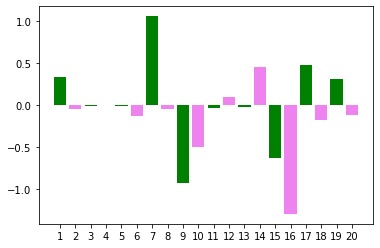

In [525]:
importance = LR_model2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance, color=["green","violet"], tick_label=[num for num in range(1,21)])
plt.show()

## The above "score" variable holds the coefficient in each case. Since our output (target), has the binary data corresponding to when a person leaves ( 1 indicates he left and 0 indicates he didn't), so a positive higher score favours 1, i.e, customer Leaves. Similarly a negative higher score favours 0, i.e, customer Doesn't leave.

# 5) Key Factors Prediciting customer churn:

## The above graph holds the features in y-axis and their corresponding coefficients in x-axis.

## We can observe that the features with highest, absolute values, both positive and negative that have a higher impact on the customers leaving are : 

### Feature 7 - InternetService_Fiber optic - Positive 
### Feature 9 - OnlineSecurity_No internet service - Negative
### Feature 10 - OnlineSecurity_Yes - Negative
### Feature 15 - Contract_One year - Negative
### Feature 16 - Contract_Two year - Negative 

# 6) Conclusions drawn: 
## Customers with an InternetService as FiberOptic are more likely to leave
## Customers with No Internet Service are Less likely to Leave
## Customers with Online security are less likely to leave
## Customers with one and two year contracts are very less likely to leave

# 7) Offers to avail to customers to encourage them to remain:
## Offer an internet service other than fiber optic or don't offer an internet service
## Offer them Online Security, OnlineBackup, Device Protection and Tech Support
## Offer them contracts equal to or longer than 1 year

# 8) How to check if they work?
## To check the validity of the claims, we can apply it on a small group of customers satisfying the said criteria. Once the said offers have been implemented and availed, we can check if a customer leaves or stays and take actions on the model accordingly. If the model predicts accurately, then we fine tune the parameters to increase the accuracy. If the model isn't up to the mark, then we change the considered factors and try again.